In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from yellowbrick.classifier import classification_report, confusion_matrix
from yellowbrick.features import rank2d
from lightgbm import LGBMClassifier, plot_importance


from settings.constants import TRAIN_CSV, VAL_CSV
from utils import DataLoader

In [2]:
train = pd.read_csv(TRAIN_CSV)
val = pd.read_csv(VAL_CSV)

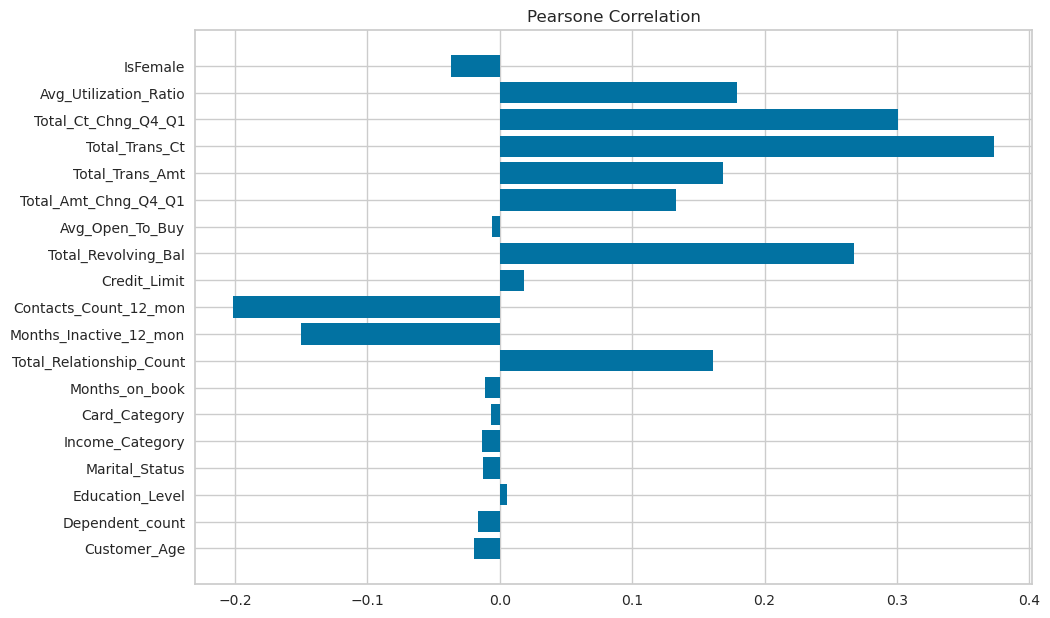

In [13]:
from yellowbrick.target.feature_correlation import FeatureCorrelation

visualizer = FeatureCorrelation(labels=train_X.columns, show=False, size=(1080, 720))
visualizer.fit(train_X, train_y)
plt.title('Pearsone Correlation')
plt.savefig('app/static/correlation.png')

In [3]:
dl = DataLoader()
dl.fit(train)
train_X, train_y = dl.load_data()
dl.fit(val)
val_X, val_y = dl.load_data()
train_X

,Customer_Age,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,IsFemale
0,3,3,0,1,2,0,0.138961,5,2,3,1.155534,-1.406390,1.283232,-0.176689,-0.773284,-0.884848,0.205827,-0.988673,0
1,4,3,2,1,4,0,-0.235406,6,2,3,-0.660206,0.224743,-0.680681,1.183537,-0.049450,0.523241,0.337836,0.846955,1
2,6,2,3,2,1,0,0.138961,5,1,1,-0.662420,1.555532,-0.803571,-0.149302,0.146317,0.395233,1.713290,2.370598,1
3,7,2,3,2,1,0,0.388539,2,1,1,0.399483,1.498150,0.263689,0.042408,1.195047,1.717984,-0.713981,-0.281267,1
4,2,4,2,1,1,0,-1.483295,4,2,2,-0.774887,-1.406390,-0.647468,-0.560108,0.008007,0.139217,-0.224269,-0.988673,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8096,0,3,2,0,3,0,-1.857662,6,4,2,-0.435605,-1.406390,-0.308136,0.562763,-0.632308,-0.372816,-0.475512,-0.988673,0
8097,4,4,2,1,3,0,0.263750,2,3,3,-0.532131,0.510435,-0.578494,0.713392,0.035847,0.651249,0.282477,0.509577,0
8098,5,3,0,2,2,0,0.263750,3,3,3,-0.238788,-0.079263,-0.231635,0.494295,0.177415,0.864596,-0.190202,-0.375588,1
8099,8,2,3,1,2,0,0.014172,4,3,1,-0.652236,1.023217,-0.745115,-0.272543,-0.107795,0.096547,-0.330728,1.674075,0


In [5]:
model = LGBMClassifier()
model.fit(train_X, train_y)
model.score(val_X, val_y)

0.9703849950641659

<AxesSubplot:title={'center':'LGBMClassifier Classification Report'}>

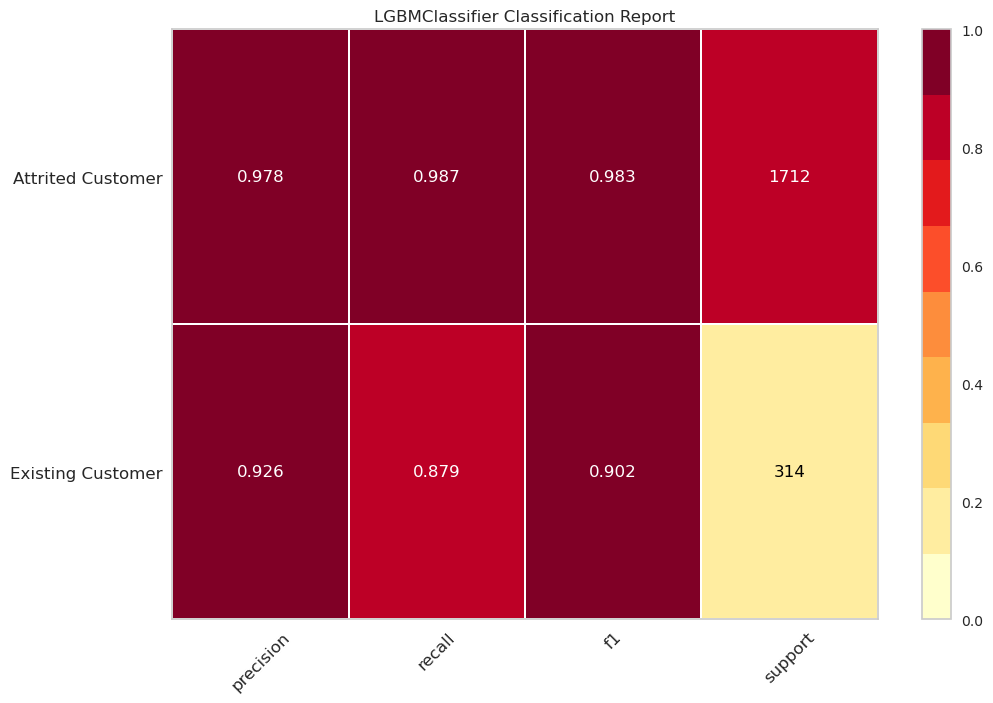

In [37]:
from yellowbrick.classifier import ClassificationReport

cr = ClassificationReport(model, support=True, classes=['Existing Customer', 'Attrited Customer'], show=False, size=(1080, 720))
cr.fit(train_X, train_y)
cr.score(val_X, val_y)
cr.show(outpath='plots/report.jpg')

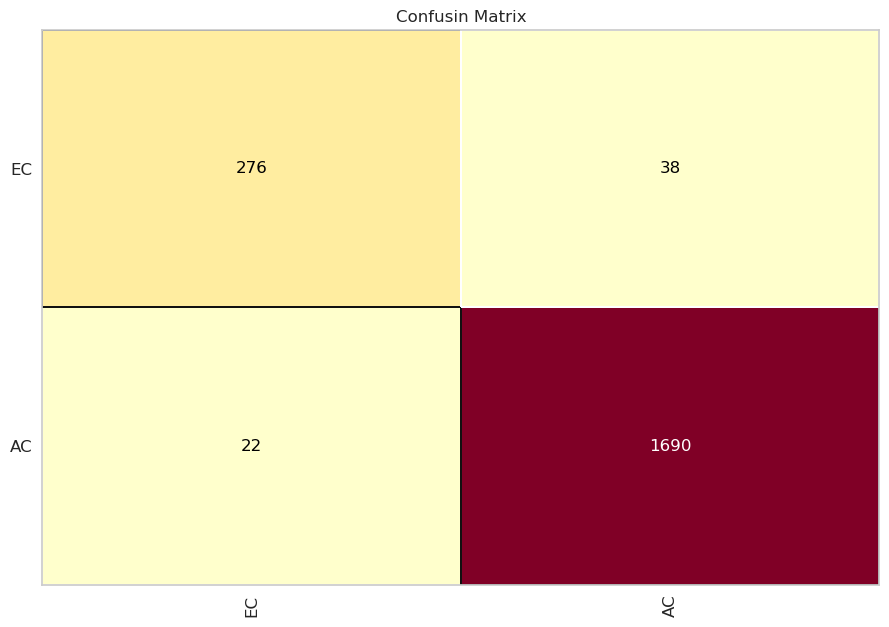

In [11]:
from yellowbrick.classifier import ConfusionMatrix

cf = ConfusionMatrix(model, classes=['EC', 'AC'], show=False, size=(1080, 720))
cf.fit(train_X, train_y)
cf.score(val_X, val_y)
plt.title('Confusin Matrix')
plt.savefig('app/static/confusion_matrix.png')

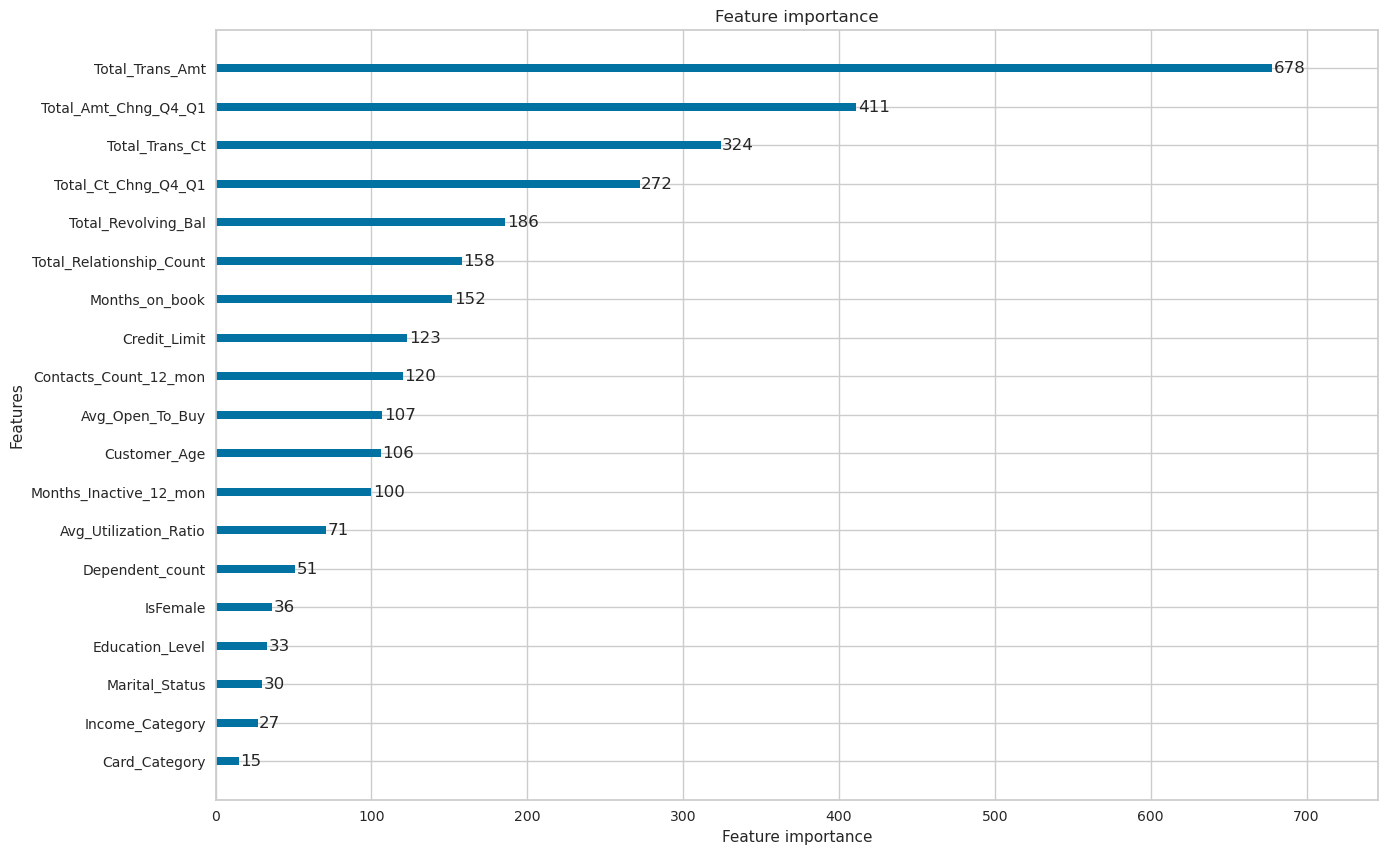

In [8]:
plot_importance(model, figsize=(15,10))
plt.savefig('app/static/importance.png')